
<h1>Activity 2 - UK ROAD ACCIDENT DATA ANALYTICS</h1>
<hr>
<h3>Analyst: Elaiza Flores Lim</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

<h2>DATABASE</h2>

In [2]:
accident_df = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
accident_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>FILLING NULL VALUES</h2>

In [4]:
accident_df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
accident_df['Latitude'] = accident_df['Latitude'].fillna(accident_df['Latitude'].mean())
accident_df['Longitude'] = accident_df['Longitude'].fillna(accident_df['Longitude'].mean())
accident_df['Road_Surface_Conditions'] = accident_df['Road_Surface_Conditions'].fillna('unaccounted')
accident_df['Road_Type'] = accident_df['Road_Type'].fillna('unaccounted')
accident_df['Urban_or_Rural_Area'] = accident_df['Urban_or_Rural_Area'].fillna(accident_df['Urban_or_Rural_Area'].mode()[0])
accident_df['Weather_Conditions'] = accident_df['Weather_Conditions'].fillna('unaccounted')
accident_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>CORRECTING DATA TYPES</h2>

In [6]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [7]:
accident_df['Index'] = accident_df['Index'].astype('category')
accident_df['Accident_Severity'] = accident_df['Accident_Severity'].astype('category')
accident_df['Light_Conditions'] = accident_df['Light_Conditions'].astype('category')
accident_df['District Area'] = accident_df['District Area'].astype('category')
accident_df['Road_Surface_Conditions'] = accident_df['Road_Surface_Conditions'].astype('category')
accident_df['Road_Type'] = accident_df['Road_Type'].astype('category')
accident_df['Urban_or_Rural_Area'] = accident_df['Urban_or_Rural_Area'].astype('category')
accident_df['Weather_Conditions'] = accident_df['Weather_Conditions'].astype('category')
accident_df['Vehicle_Type'] = accident_df['Vehicle_Type'].astype('category')

<h1>CLEARING INCONSISTENCIES WITH THE DATA SET</h1>

In [8]:
accident_df['Accident Date'] = accident_df['Accident Date'].str.strip()
accident_df['Accident Date'] = accident_df['Accident Date'].astype('str')
accident_df['Accident Date'] = accident_df['Accident Date'].str.replace('/', '-')

In [9]:
accident_df['Accident Date'] = pd.to_datetime(accident_df['Accident Date'], dayfirst=True, errors = 'coerce')
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h1>EXTRACTING DATE INFORMATION USING PADAS DATE TIME</h1>

In [10]:
accident_df['Year'] = accident_df['Accident Date'].dt.year
accident_df['Month'] = accident_df['Accident Date'].dt.month
accident_df['Day'] = accident_df['Accident Date'].dt.day
accident_df['DayOfWeek'] = accident_df['Accident Date'].dt.dayofweek # Monda=0, Sunday

In [11]:
accident_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [12]:
accident_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h5>UniVariate</h5>
<h5>BiVariate</h5>
<h5>MultiVariate</h5>

<h1>1. What district area has the most accident when the road condition and weather condition is involved from the year 2020?</h1>

In [13]:
year_2020 = accident_df[accident_df['Year'] == 2020]
year_2020.groupby(['District Area', 'Road_Surface_Conditions', 'Weather_Conditions']).size().sort_values(ascending=False).head(10)

District Area  Road_Surface_Conditions  Weather_Conditions
Birmingham     Dry                      Fine no high winds    2252
Leeds          Dry                      Fine no high winds    1580
Westminster    Dry                      Fine no high winds    1111
Manchester     Dry                      Fine no high winds    1016
Liverpool      Dry                      Fine no high winds     932
Bradford       Dry                      Fine no high winds     931
Glasgow City   Dry                      Fine no high winds     877
Sheffield      Dry                      Fine no high winds     849
Lambeth        Dry                      Fine no high winds     814
Southwark      Dry                      Fine no high winds     807
dtype: int64

The total number of accident in year 2020 is  170591


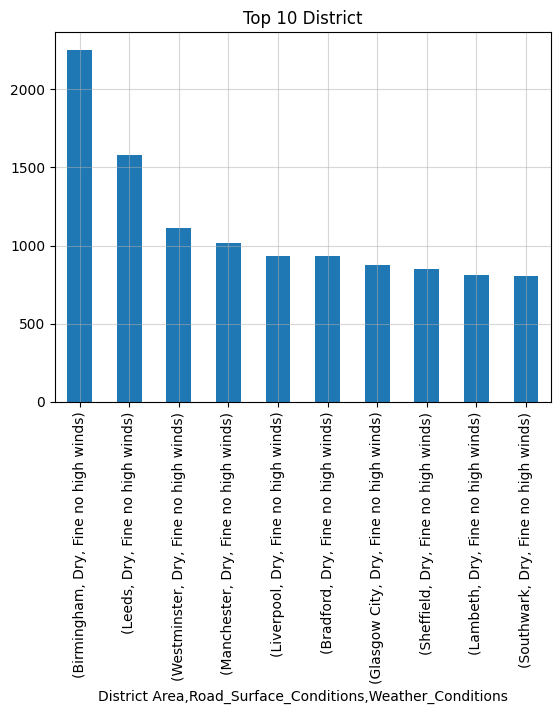

In [14]:
print('The total number of accident in year 2020 is ', year_2020.groupby(['District Area', 'Road_Surface_Conditions', 'Weather_Conditions']).size().sum())
year_2020.groupby(['District Area', 'Road_Surface_Conditions', 'Weather_Conditions']).size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 District')
plt.grid(alpha=0.5)
plt.show()

In [15]:
year_2020['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     113506
Wet or damp              52076
Frost or ice              3870
Snow                       598
Flood over 3cm. deep       331
unaccounted                210
Name: count, dtype: int64

In [16]:
year_2020['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       132513
Raining no high winds     21984
Other                      4265
unaccounted                3937
Raining + high winds       3130
Fine + high winds          2861
Fog or mist                 981
Snowing no high winds       719
Snowing + high winds        201
Name: count, dtype: int64

<h2>Insight No 1</h2>
Insight: From the year 2020, when the road condition is dry and the weather condition is fine no high winds, the Bermingham district has the most recorded number of 2,252 accident, that is just 1.3% of the whole number of accident which is  170,591. This gives me the idea that even when the weather condition is good accident still happen. 

<h2>Insight No 2</h2>
The total accident on dry road condtion is 113,506 which is 66.5% of the total accident that is 170,591. For me, this is a really good weather for a drive beacuse there is nothing to worry about, I guess humans are most vulnerable when we are in a relaxed environment or in a relaxed situation then plot twist somethime happened and that is a unfortunate accident.

<h1>2. In year 2020, what type of vehicle is most prone to accident when the weather condition is raining with high winds is involved? (Not including Cars)</h1>

In [17]:
year_2020['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       132513
Raining no high winds     21984
Other                      4265
unaccounted                3937
Raining + high winds       3130
Fine + high winds          2861
Fog or mist                 981
Snowing no high winds       719
Snowing + high winds        201
Name: count, dtype: int64

In [18]:
no_car = year_2020[year_2020['Vehicle_Type'] != 'Car']
raining_now = no_car['Weather_Conditions'].value_counts()
raining_now

Weather_Conditions
Fine no high winds       33027
Raining no high winds     5591
Other                     1088
unaccounted                999
Raining + high winds       763
Fine + high winds          727
Fog or mist                265
Snowing no high winds      181
Snowing + high winds        56
Name: count, dtype: int64

In [19]:
no_car = year_2020[year_2020['Weather_Conditions'] == 'Raining + high winds']
raining_now = no_car['Vehicle_Type'].value_counts()
raining_now

Vehicle_Type
Car                                      2367
Van / Goods 3.5 tonnes mgw or under       173
Motorcycle over 500cc                     116
Bus or coach (17 or more pass seats)      111
Goods 7.5 tonnes mgw and over              93
Motorcycle 125cc and under                 66
Taxi/Private hire car                      62
Motorcycle over 125cc and up to 500cc      37
Motorcycle 50cc and under                  30
Other vehicle                              30
Goods over 3.5t. and under 7.5t            25
Agricultural vehicle                       13
Minibus (8 - 16 passenger seats)            7
Data missing or out of range                0
Pedal cycle                                 0
Ridden horse                                0
Name: count, dtype: int64

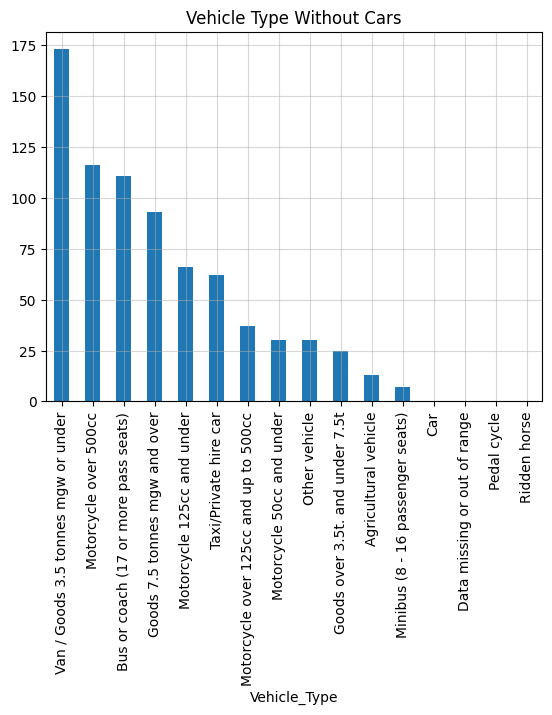

In [20]:
no_car = year_2020[year_2020['Weather_Conditions'] == 'Raining + high winds']
raining_now = no_car[no_car['Vehicle_Type'] != 'Car']['Vehicle_Type'].value_counts()
raining_now.plot(kind='bar')
plt.title('Vehicle Type Without Cars')
plt.grid(alpha=0.5)
plt.show()

<h2>Insight No 3</h2>
Insight: Wihout including the Car, the most prone are Van / Goods 3.5 tonnes mgw or under. Maybe because they are more active at road because Vans could be a vehicle for transporation and Van Goods are those who trade products. It could be that there are time limit for arriving that is why they sped up and end up in accident.    

<h1>3. What road surface condition has the most accident in the year 2019 and what road type does it mostly happened?</h1>

In [21]:
year_2019 = accident_df[accident_df['Year'] == 2019]
year_2019.groupby(['Road_Surface_Conditions', 'Road_Type']).size().sort_values(ascending=False).head(10)

Road_Surface_Conditions  Road_Type         
Dry                      Single carriageway    92487
Wet or damp              Single carriageway    39491
Dry                      Dual carriageway      19189
Wet or damp              Dual carriageway       8545
Dry                      Roundabout             8226
Wet or damp              Roundabout             3299
Dry                      One way street         2888
Frost or ice             Single carriageway     2150
Dry                      Slip road              1344
                         unaccounted            1214
dtype: int64

The total sum of accident from the year 2019 is 182115


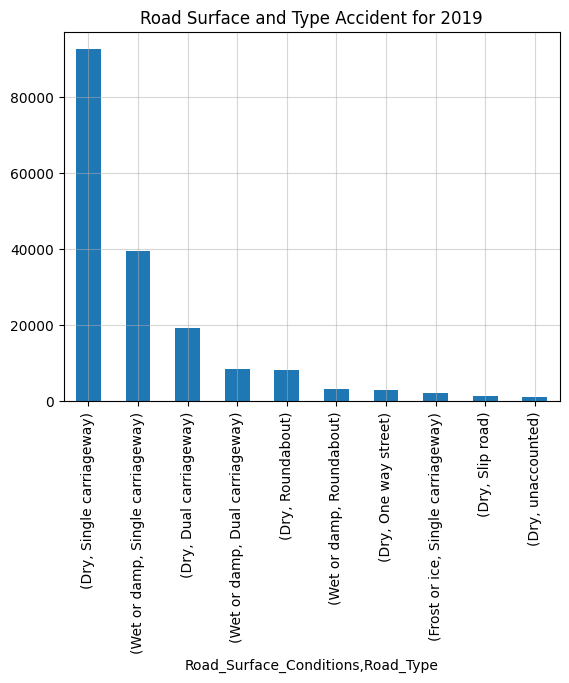

In [22]:
year_2019['Road_Surface_Conditions'].value_counts()
print('The total sum of accident from the year 2019 is', year_2019.groupby(['Road_Surface_Conditions', 'Road_Type']).size().sum())
year_2019.groupby(['Road_Surface_Conditions', 'Road_Type']).size().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title('Road Surface and Type Accident for 2019')
plt.grid(alpha=0.5)
plt.show()

<h2>Insight No 4</h2>
Insight: In the year 2019, accident mostly happened from  dry road surface condtions on a single carriageway road type with 92487 record which is 50.78% of the 182115 total accident. Its a dry road so its good for driving compared to wet or damp who has 39491 record which is 21.68%. I thought that it is more dangerous to drive when the road is wet bacause it is slippery but this data shows me that maybe accidents are mostly made by human errors.  

<h2>Insight No 5</h2>
Insight: Comparing Single carriageway and Dual carriageway when the road condition is dry, what I found is  that dual carriageway are seperated by something like a barrier in the middle. So maybe this factor plays at the number of accidents, drivers at the dual carriageway feel more safer because of the barrier at the middle that is why they drive safer.   

<h1>4. Compare the year 2019 - 2022, In the month of december, does the record of accident is rising or decreasing?<h1>

In [23]:
accident_df.groupby(['Year','Month']).size().unstack()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2019,15355,13253,15049,14125,15833,15528,15862,15044,15271,15528,16559,14708
2020,14133,14353,13494,13394,14336,14205,14630,13366,14432,15684,14770,13794
2021,13417,10950,13202,12715,13811,13936,14300,13415,13792,14834,15473,13709
2022,9967,10935,12341,11510,12372,12812,12653,12088,12960,13534,13622,9625


<h2>Insight No 6</h2>
Insight: The number 12 of month indicates December, 2019 has the most record of accident with 14708 record and as the year goes by, the number are decreasing even just a little with 13794 record on 2020, 13709 record on 2021 and the lowest recorded is in 2022 with 9625. The record of accident in every December is decreasing as the year goes by. Maybe one of the factor is Christmas that driver are more careful and think to be with their family. 

<h2>Insight No 7</h2>
Insight: After anylazing the result, I learned that december has the lowest record compared to other months in every year. It is Christmas which makes me sure that there will be a lot of vehicles which will cause accident because people are visiting many places. But maybe, because of something like a traffic jam on road because of many vehicles on christmas, it decreases the speed of the vehicles and which lowers the chance of accidents.

<h1>5. Which road type has the most recorded fatal accident severity?</h1>

In [24]:
accident_df.groupby(['Road_Type', 'Accident_Severity']).size().sort_values(ascending=False).unstack()

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,1815,11746,85863
One way street,95,1655,11809
Roundabout,142,3665,40185
Single carriageway,6527,70059,415557
Slip road,49,611,6381
unaccounted,33,481,4006


<h2>Insight No 8</h2>
Insight: The road type most associated with fatal accident severity is Single carriageway, with 6,527 fatal accidents recorded. This suggests that single carriageways often narrower and lacking physical separation between opposing traffic pose a higher risk for deadly collisions.

<h2>Insight No 9</h2>
The highest overall count in the dataset is Single carriageway + Slight severity, totaling 415,557 incidents. This indicates that while single carriageways are the deadliest, they also experience the most minor accidents likely due to their widespread use and exposure.

<h2>Insight No 10</h2>
Roundabouts show a much lower fatal accident count only 142 fatalities despite having 40,185 slight and 3,665 serious accidents. This supports the idea that roundabouts, by design, reduce high-speed collisions and thus lower the risk of fatal outcomes.

<h1>6. Which light condition is most common in serious accidents?</h1>

In [25]:
accident_df[accident_df['Accident_Severity'] == 'Serious']['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       60759
Darkness - lights lit          19130
Darkness - no lighting          7174
Darkness - lighting unknown      794
Darkness - lights unlit          360
Name: count, dtype: int64

Text(0.5, 1.0, 'Light Condtion')

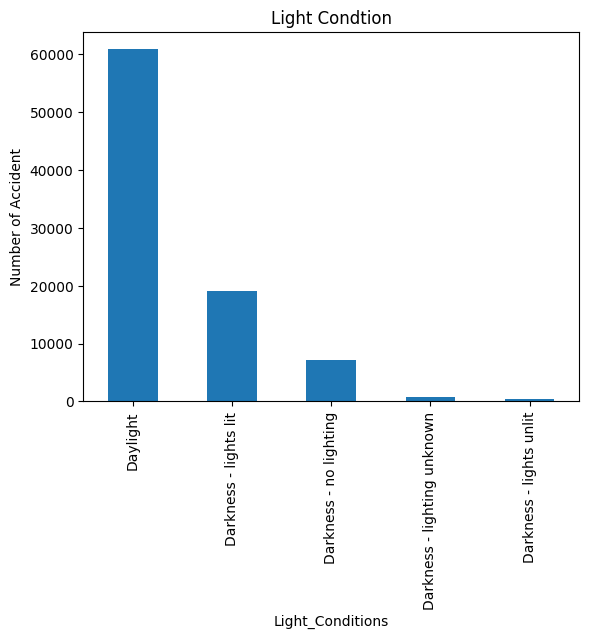

In [26]:
accident_df[accident_df['Accident_Severity'] == 'Serious']['Light_Conditions'].value_counts().plot(kind='bar')
plt.ylabel('Number of Accident')
plt.title('Light Condtion')

In [27]:
accident_df.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack()

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,68,794,5622
Darkness - lights lit,1860,19130,108345
Darkness - lights unlit,45,360,2138
Darkness - no lighting,1612,7174,28651
Daylight,5076,60759,419045


<h2>Insight No 11</h2>
Insight: Daylight accounts for 60,759 serious accidents, the highest among all lighting conditions. This is likely due to higher traffic volume during daytime hours, increasing the chance of collisions.

<h2>Insight No 12</h2>
Although it has fewer total accidents, Darkness  no lighting recorded 1,612 fatal incidents, second only to daylight. This suggests that poor visibility and lack of street lighting significantly raise the risk of deadly outcomes.

<h2>Insight No 13</h2>
Under Darkness  lights lit, there are 108,345 slight accidents but only 1,860 fatal ones. This indicates that proper street lighting helps mitigate accident severity by improving visibility and reaction time.

<h1>7. Which weather condition is most common in urban vs. rural accident locations?</h1>

In [28]:
accident_df.groupby(['Weather_Conditions', 'Urban_or_Rural_Area']).size().unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
Weather_Conditions,,,
Fine + high winds,3993,1,4560
Fine no high winds,181792,5,339088
Fog or mist,2385,0,1143
Other,7337,0,9813
Raining + high winds,4723,0,4892
Raining no high winds,31173,5,48518
Snowing + high winds,571,0,314
Snowing no high winds,3050,0,3188
unaccounted,3966,0,10162


<h2>Insight No 12</h2>
Insight: Fine weather with no high winds accounts for the highest number of accidents in both urban 339,088 and rural 181,792 areas. This suggests that accidents are more influenced by traffic volume than adverse weather conditions.

<h2>Insight No 13</h2>
Raining without high winds caused 48,518 accidents in urban areas, compared to 31,173 in rural zones. Urban environments may be more vulnerable due to congestion and slippery surfaces during rainfall.

<h2>Insight No 14</h2>
Fog or mist led to 2,385 rural accidents, more than double the 1,143 recorded in urban areas. Reduced visibility and higher driving speeds in rural regions likely contribute to this elevated risk.

<h1>8. On the Disctrict of Purbeck, what day does slight severity mostly happened?</h1>

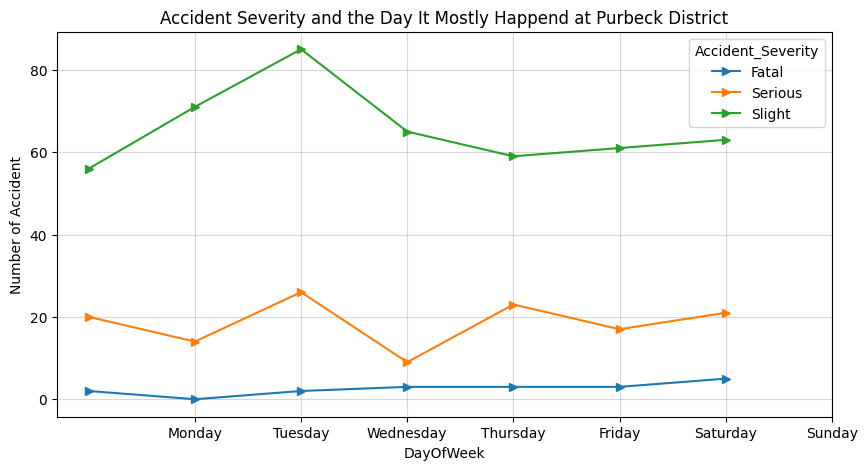

In [29]:
purbeck_df = accident_df[accident_df['District Area'] == 'Purbeck']
monthly_data = purbeck_df.groupby(['Accident_Severity', 'DayOfWeek']).size()

monthly_data = monthly_data.unstack(level=0)
monthly_data.plot( marker='>', figsize=(10, 5), title='Accident Severity and the Day It Mostly Happend at Purbeck District'
)
plt.xticks(range(1, 8), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday',])
plt.ylabel('Number of Accident')
plt.grid(alpha=0.5)
plt.show()

<h2>Insight No 15</h2>
Accidents in Purbeck District peak on Tuesdays across all severity levels, with slight accidents being the most frequent. Every accident severity is at peak during Tuesday. What I think is that this has something to do with traffic, Tuesday might be a rush hour day for Purbeck District.

<h1>9. How have accident trends changed over time across urban and rural areas?</h1>

In [30]:
accident_df.groupby(['Urban_or_Rural_Area', 'Year']).size().unstack()

Year,2019,2020,2021,2022
Urban_or_Rural_Area,,,,
Rural,67558,61991,59016,50425
Unallocated,5,6,0,0
Urban,114552,108594,104538,93994


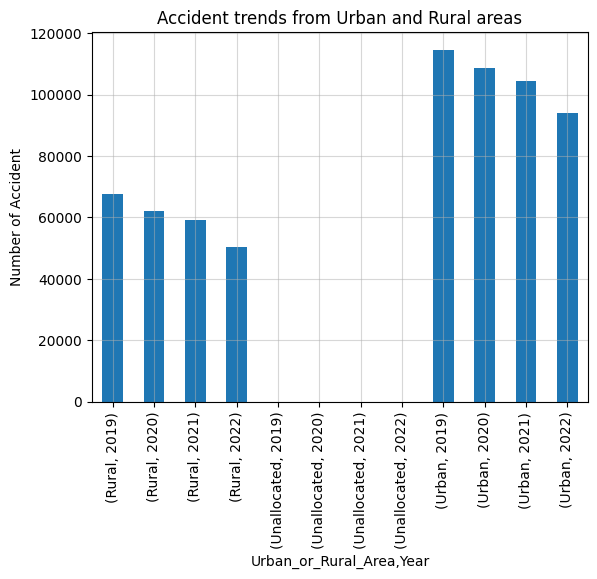

In [31]:
accident_df.groupby(['Urban_or_Rural_Area', 'Year']).size().plot(kind='bar')
plt.title('Accident trends from Urban and Rural areas')
plt.grid(alpha=0.5)
plt.ylabel('Number of Accident')
plt.show()

<h2>Insight No 16</h2>
Insight: Urban areas have the highest accident counts every year, peaking at 114,552 in 2019. This reflects higher traffic density and vehicle volume in cities, increasing the likelihood of collisions.

<h2>Insight No 17</h2>
From 2019 to 2022, urban accidents dropped by 20,558, while rural accidents fell by 17,133. This downward trend may be influenced by pandemic related travel restrictions and improved road safety measures.

<h2>Insight No 18</h2>
Rural accident counts dropped from 67,558 in 2019 to 50,425 in 2022, a decrease of over 25%. This sharper decline compared to urban areas may reflect reduced long distance travel or improved rural road safety initiatives during and after the pandemic.

<h1>10. How does accident severity vary across different weather conditions?</h1>

In [32]:
accident_df.groupby(['Weather_Conditions','Accident_Severity']).size().unstack()

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7100,72046,441739
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637
unaccounted,107,1239,12782


<h2>Insight No 19</h2>
Under fine weather with no high winds, there are 441,739 slight, 72,046 serious, and 7,100 fatal accidents. This shows that most accidents happen in good weather, likely due to higher traffic volume rather than hazardous conditions.

<h2>Insight No 20</h2>
Raining without high winds caused 9,468 serious and 69,380 slight accidents, making it the second most accident prone condition. Wet roads and reduced visibility likely contribute to this elevated risk, especially in urban settings

<h2>Insight No 21</h2>
Snowing no high winds led to 5,637 slight, 565 serious, and 36 fatal accidents. Although rare, snow creates dangerous driving conditions that can escalate accident severity quickly.

<h1>11. Which combination of road type and light condition results in the top 10 highest number of serious accidents?</h1>

Text(0, 0.5, 'Number of Accident')

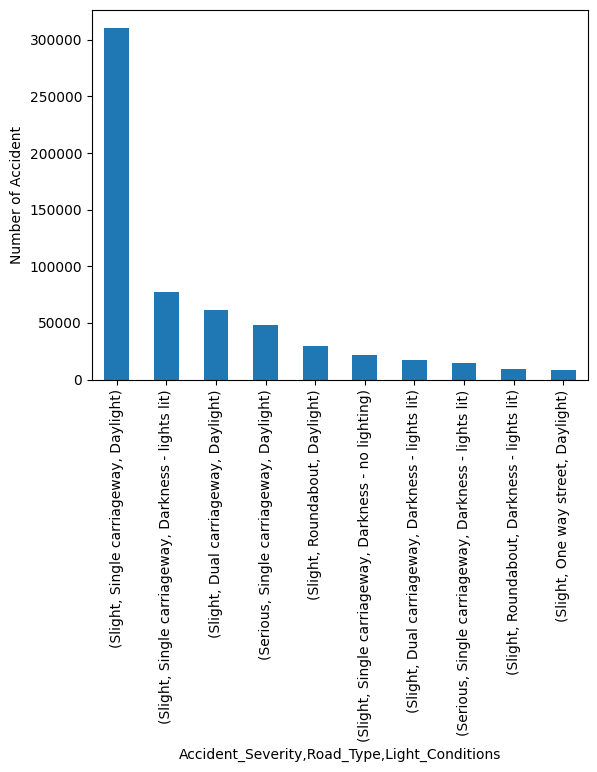

In [33]:
accident_df.groupby(['Accident_Severity','Road_Type', 'Light_Conditions']).size().sort_values(ascending=False).head(10).plot(kind='bar',)
plt.ylabel('Number of Accident')

In [34]:
accident_df.groupby(['Accident_Severity','Road_Type', 'Light_Conditions']).size().sort_values(ascending=False).head(10).unstack()

Light_Conditions                      Daylight  Darkness - lights lit  \
Accident_Severity Road_Type                                             
Slight            Single carriageway  310730.0                77289.0   
                  Dual carriageway     61799.0                17025.0   
                  Roundabout           29895.0                 9503.0   
                  One way street        8726.0                    NaN   
Serious           Single carriageway   48607.0                14733.0   

Light_Conditions                      Darkness - no lighting  
Accident_Severity Road_Type                                   
Slight            Single carriageway                 22075.0  
                  Dual carriageway                       NaN  
                  Roundabout                             NaN  
                  One way street                         NaN  
Serious           Single carriageway                     NaN

<h2>Insight No 22</h2>
Insight: The combination of light condition of daylight and road type of roundasbout causes the highest number of serious accidents with 48956 recorded .

<h1>12.  How do weather conditions influence road surface states during accidents?</h1>

In [35]:
accident_df[accident_df['Accident_Severity'] == 'Fatal'].groupby(['Weather_Conditions', 'Road_Surface_Conditions']).size().sort_values(ascending=False).unstack(0)

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,unaccounted
Road_Surface_Conditions,,,,,,,,,
Dry,103,5580,18,12,0,2,0,2,71
Flood over 3cm. deep,1,4,0,0,5,11,0,0,2
Frost or ice,3,121,8,43,1,5,0,8,4
Snow,0,14,0,1,0,1,2,17,0
Wet or damp,68,1380,56,109,139,829,1,9,29
unaccounted,0,1,0,0,0,0,0,0,1



<h2>Insight No 23</h2>
Raining no high winds and raining + high winds together account for 968 accidents on wet or damp roads. This confirms that rain consistently leads to slippery surfaces, increasing the likelihood of collisions. This is what I find strange because I thought that raining is the most dangerous for the car tires that may cause accident.

<h2>Insight No 24</h2>
I was more surpised when the weather is Fog or Mist and the road is Wet or damp with the record 56 accident, these usually causes more accidents in movies but I guess that was just fiction. But maybe because of these condition that driver are more serious about driving because they know what will happen if they speed up the vehicles and they know that being reckless in these kind of condition is dangerous so they will likely try to drive safely.

<h1>13. At District Area of Highland, where does accident mostly happend Urban or Rural Area?</h1>

In [36]:
highland = accident_df[accident_df['District Area'] == 'Highland']

In [37]:
rural_urban = highland['Urban_or_Rural_Area'].value_counts()
rural_urban.index

CategoricalIndex(['Rural', 'Urban', 'Unallocated'], categories=['Rural', 'Unallocated', 'Urban'], ordered=False, dtype='category', name='Urban_or_Rural_Area')

In [38]:
rural_urban.values

array([1811,  210,    0])

In [39]:
rural_urban.sum()

np.int64(2021)

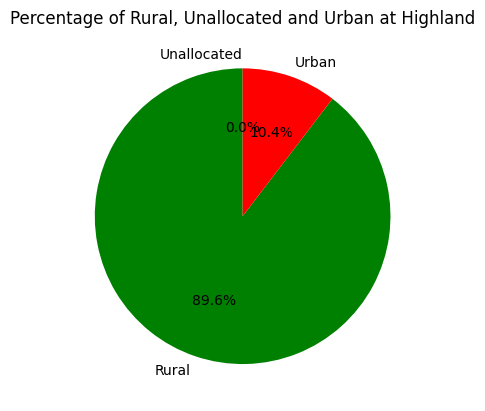

In [40]:
plt.pie(rural_urban, 
        labels = rural_urban.index,
        startangle= 90,
        autopct = '%1.1f%%',
        colors = ['Green','Red', 'Pink'])
plt.title('Percentage of Rural, Unallocated and Urban at Highland')
plt.show()

<Axes: xlabel='Urban_or_Rural_Area,Accident_Severity'>

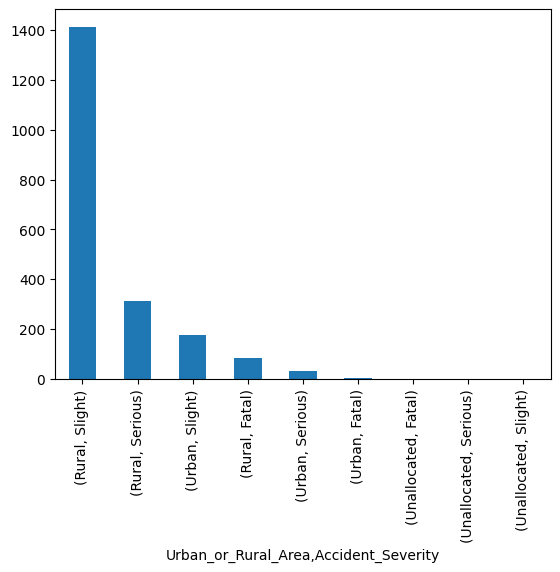

In [41]:
highland.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().sort_values(ascending=False).plot(kind='bar')

<h2>Insight No 25</h2>
From the District of Highland, there are more accidents from Rural Area which covers 89.6% of 2021 records, the most common severity is fatal accidents. This is surprising because rural areas have lower population compared to urban area. The people of this district might have to do something with this because the majority of their people might be on rural areas. 

<hr>
<hr>
<hr>
<br>
<h1>Using District Area to make a comparison to a general result </h1>
<h1>Shropshire Analysis</h1>
<img src = 'https://ichef.bbci.co.uk/news/976/cpsprodpb/0537/production/_128253310_gettyimages-598907143.jpg'>

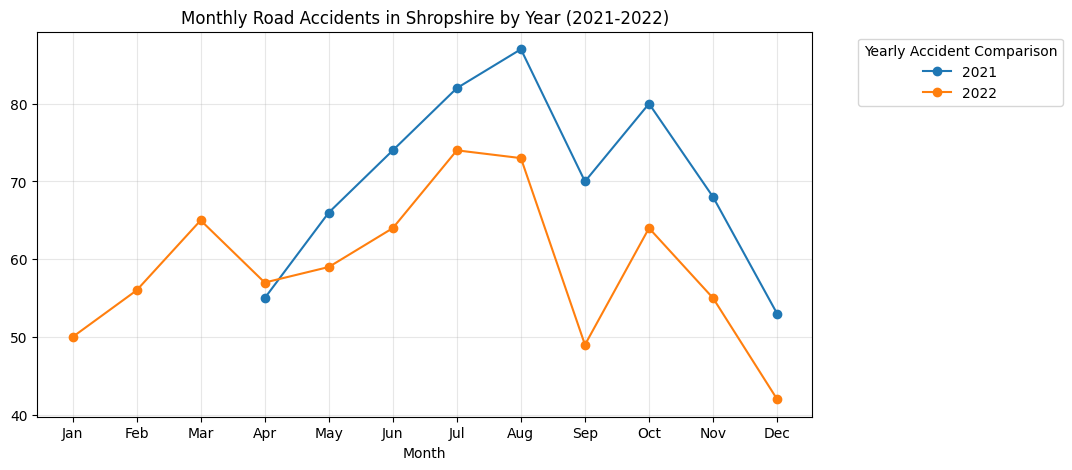

In [42]:
shropshire_df = accident_df[accident_df['District Area'] == 'Shropshire']


monthly_shropshire_df = shropshire_df.groupby(['Year', 'Month']).size()

monthly_shropshire_df = monthly_shropshire_df.unstack(level=0)

monthly_shropshire_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Shropshire by Year (2021-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

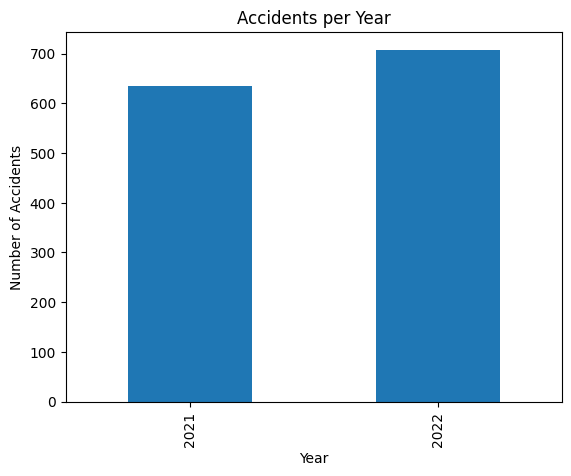

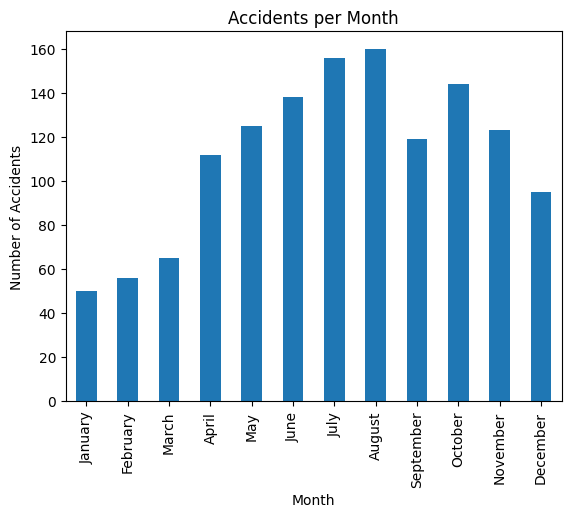

DayOfWeek
Monday       193
Tuesday      199
Wednesday    183
Thursday     185
Friday       174
Saturday     225
Sunday       184
Name: count, dtype: int64


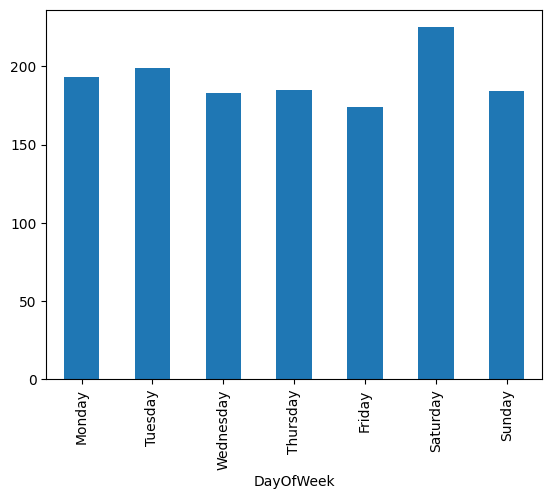

In [43]:
# Accidents per year
accidents_per_year = shropshire_df['Year'].value_counts().sort_index()
accidents_per_month = shropshire_df['Month'].value_counts().sort_index()
accidents_per_day = shropshire_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Accident Severity in Shropshire</h1>

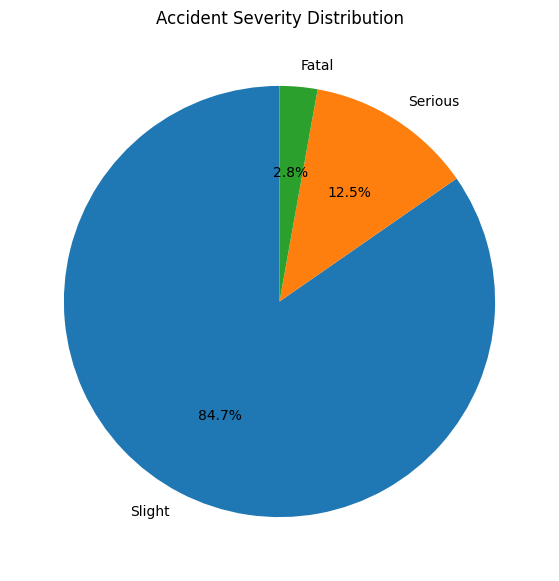

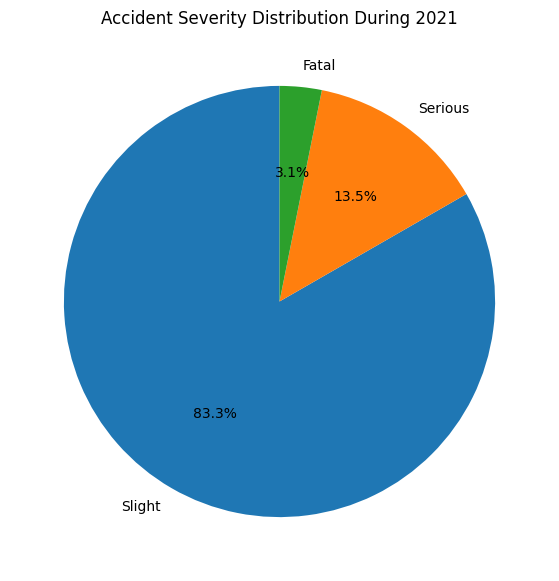

In [44]:
severity_shropshire  = shropshire_df['Accident_Severity'].value_counts()

plt.pie(severity_shropshire,
        labels = severity_shropshire.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_shropshire = shropshire_df[shropshire_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_shropshire['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution During 2021')
plt.show()

<h2>Insight No 26</h2>
<p>From the District of Shropshire, we can see from Monthly Road Accidents by year 2021-2022 that the Month of August record the most accident from both year  but it has the same pattern with September decreasing then increasing again at October and continue to decrease until December. After looking at some article online, August is summer holiday season in UK, this may be the reason for more vehicles on the road and some tourist that are not familiar on roads.</p>
<p>The Year 2022 recorded the most accident.
The Month of August has the highest record of accident while January has the lowest which I thought would be higher because this is after the celebrations.</p>
<p>The day that is more prone to accident is Saturday which I think that since its weekend many people are driving on the road.</p>
The majority of accident causes slight severity with 84.7% even during the year 2021 with 83.3%

<h1>Shropshire HeatMap Accident</h1>

In [45]:
import folium
from folium.plugins import HeatMap

locations = list(zip(shropshire_df['Latitude'], shropshire_df['Longitude']))

m = folium.Map(location=[shropshire_df['Latitude'].mean(), shropshire_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m) 
m.save('shropshire_df.html')
m

<hr>
<hr>
<hr>
<h1>Isle of Wight Analysis</h1>
<img src = 'https://ichef.bbci.co.uk/news/976/cpsprodpb/135D1/production/_120531397_iowgettyimages-1272579144.jpg'>

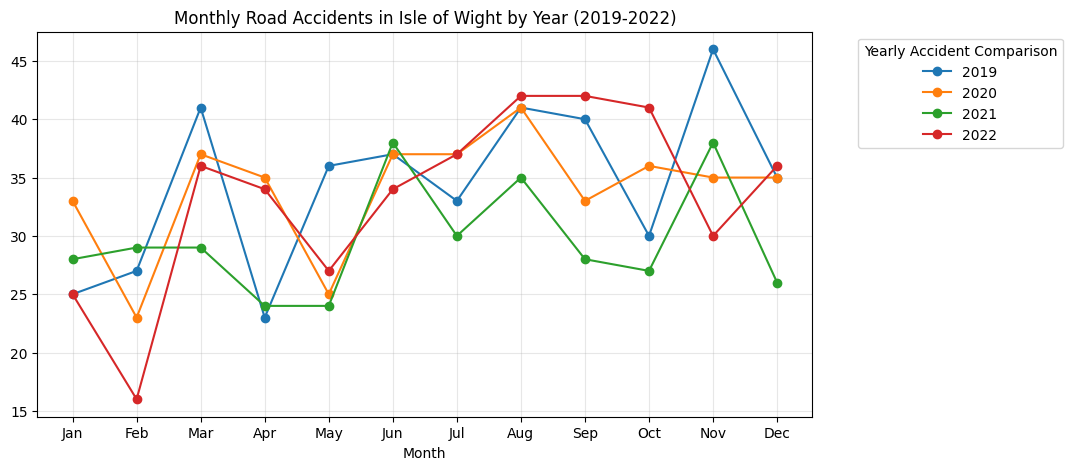

In [46]:
islewight_df = accident_df[accident_df['District Area'] == 'Isle of Wight']
monthly_islewight_df = islewight_df.groupby(['Year', 'Month']).size()

monthly_islewight_df = monthly_islewight_df.unstack(level=0)

monthly_islewight_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Isle of Wight by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

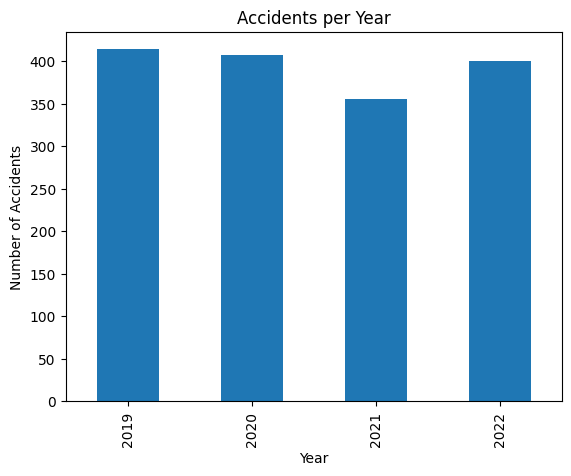

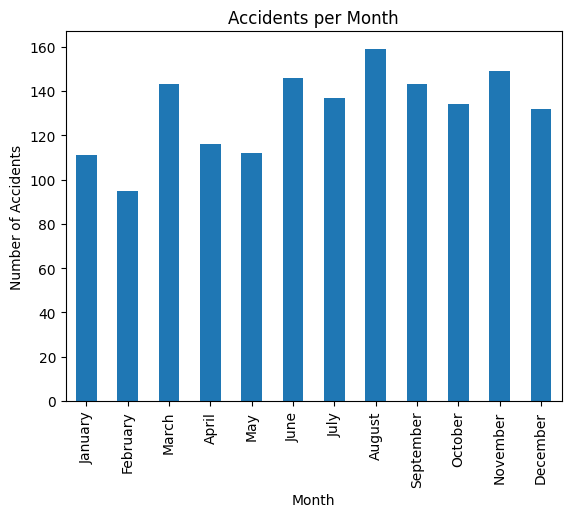

DayOfWeek
Monday       178
Tuesday      239
Wednesday    225
Thursday     254
Friday       237
Saturday     271
Sunday       173
Name: count, dtype: int64


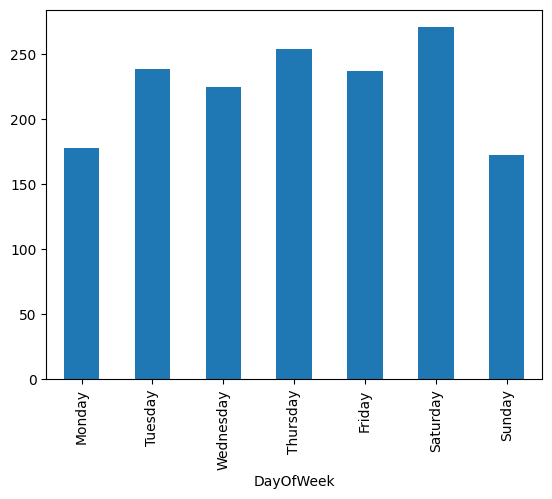

In [47]:
# Accidents per year
accidents_per_year = islewight_df['Year'].value_counts().sort_index()
accidents_per_month = islewight_df['Month'].value_counts().sort_index()
accidents_per_day = islewight_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Accident Severity in Isle of Wight</h1>

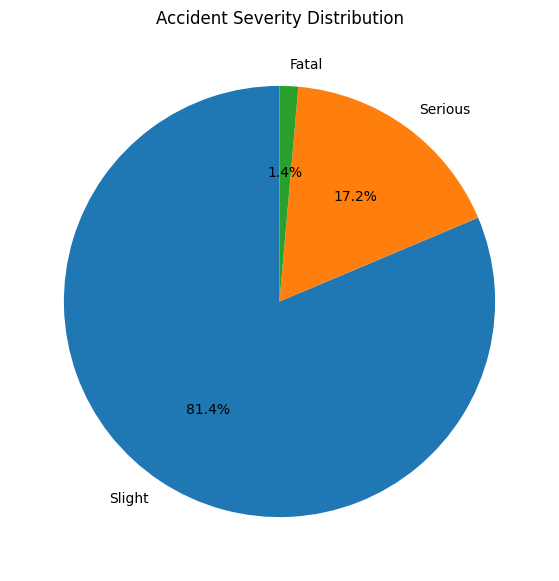

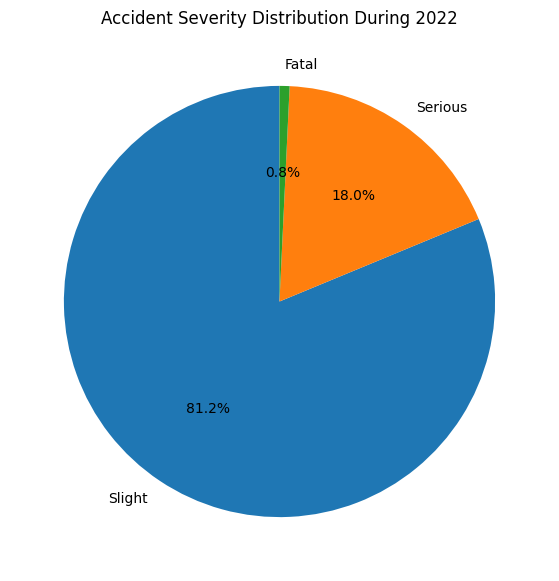

In [48]:
severity_islewight  = islewight_df['Accident_Severity'].value_counts()

plt.pie(severity_islewight,
        labels = severity_islewight.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_islewight = islewight_df[islewight_df['Year'] == 2022]
# severity_2021
lsc_2021 = severity_2021_islewight['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution During 2022')
plt.show()

<h2>Insight No 27</h2>
<p>From the District of Isle of Wight, we can see from Monthly Road Accidents by year 2019-2022 that the Month of April every year experience the sudden decrease of accidents maybe because this is work days and no tourist and less driver on the road</p>
<p>The Year 2019 recorded the most accident which I think that COVID 19 is a factor, though every year is not far from each other.
The Month of August has the still has highest record of accident same with Shropshire while February has the lowest which is different from Shropshire District because the reason could be that Isle of Wight is a coastal district </p>
<p>The day that is more prone to accident is  still Saturday like Shropshire which I think that since its weekend many people are driving on the road.</p>
The majority of accident causes slight severity with 81.4% even during the year 2022 with 81.2%.


<h1>Isle of Wight HeatMap Accident</h1>

In [49]:
locations = list(zip(islewight_df['Latitude'], islewight_df['Longitude']))

m = folium.Map(location=[islewight_df['Latitude'].mean(), islewight_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m) 

m.save('islewight_df.html')
m

<hr>
<hr>
<hr>
<h1>Mid Bedfordshire Analysis</h1>
<img src = 'https://ichef.bbci.co.uk/news/976/cpsprodpb/B4E9/production/_131331364_midbedsaerial1.jpg'>

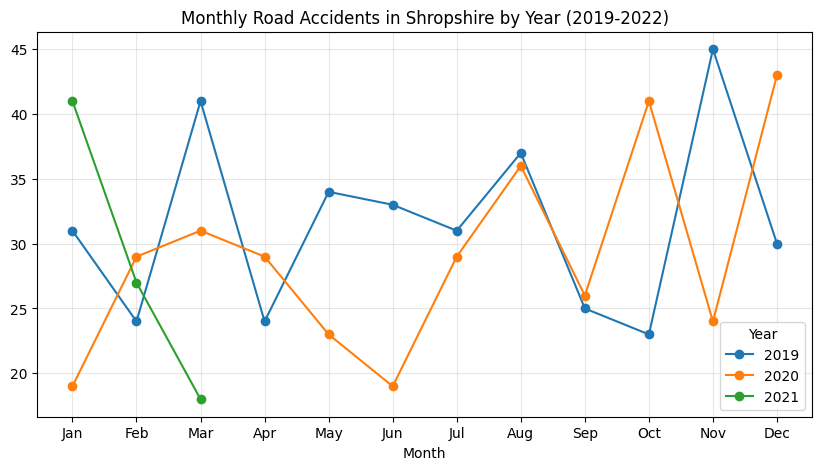

In [50]:
midbedfordshire_df = accident_df[accident_df['District Area'] == 'Mid Bedfordshire']
monthly_midbedfordshire_df = midbedfordshire_df.groupby(['Year', 'Month']).size()

monthly_midbedfordshire_df = monthly_midbedfordshire_df.unstack(level=0)

monthly_midbedfordshire_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Shropshire by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

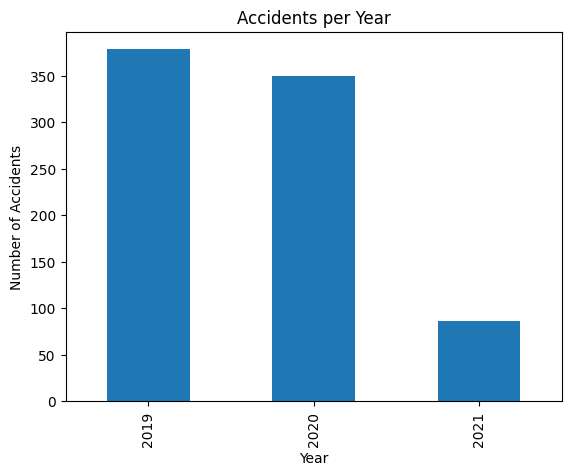

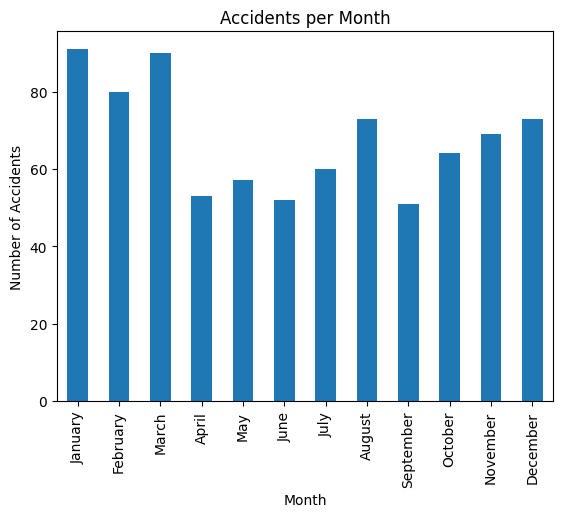

DayOfWeek
Monday       115
Tuesday      117
Wednesday    107
Thursday     130
Friday       116
Saturday     101
Sunday       127
Name: count, dtype: int64


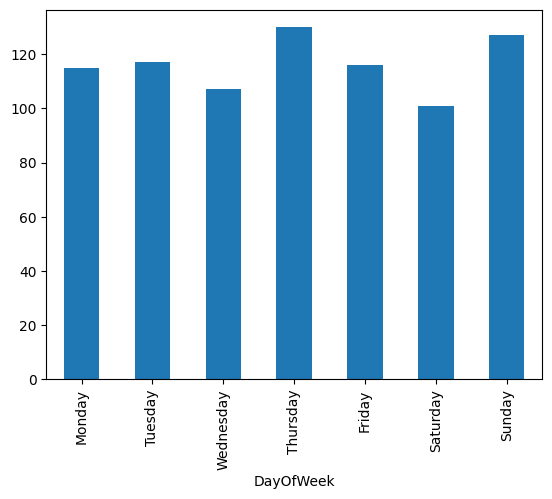

In [51]:
# Accidents per year
accidents_per_year = midbedfordshire_df['Year'].value_counts().sort_index()
accidents_per_month = midbedfordshire_df['Month'].value_counts().sort_index()
accidents_per_day = midbedfordshire_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Accident Severity in Mid Bedfordshire</h1>

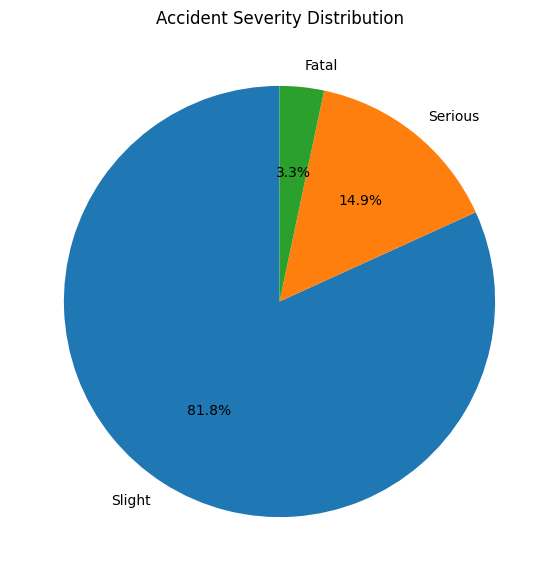

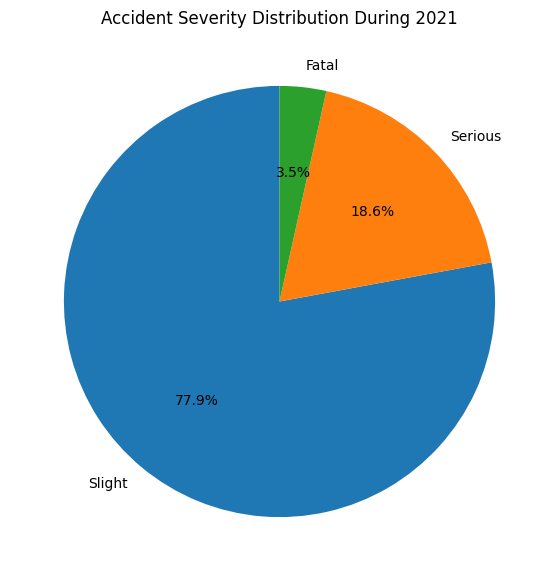

In [52]:
severity_midbedfordshire  = midbedfordshire_df['Accident_Severity'].value_counts()

plt.pie(severity_midbedfordshire,
        labels = severity_midbedfordshire.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_midbedfordshire = midbedfordshire_df[midbedfordshire_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_midbedfordshire['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution During 2021')
plt.show()

<h2>Insight No 28</h2>
<p>From the District of Mid Bedfordshire, we can see from Monthly Road Accidents by year 2019-2021 that there is incomplete data from the year 2021 so we will take this in consideration though January to March, showing a steady decline from about 35 accidents in January to around 20 in March. The month November during 2019 and 2020 is opposite which suggest that it could affected by pre pandemic and during of COVID19 pandemic </p>

<p>The Year 2019 recorded the most accident which I think that COVID 19 is a factor, though the year 2020 is not far.</p>

<p>The Month of January has the highest number of accident which is different to Shropshire and Isle of Wight and the reason could be beacuse of post holiday travel when people are going back to their work or city.</p>

<p>The day that is more prone to accident is  Thursday unlike Shropshire and Isle of Wight, maybe because of the work or being overworked that caused fatigue to drivers</p>
The majority of accident causes slight severity with 81.8% even during the year 2022 with 77.9%.</p>

<h1>Mid Bedfordshire HeatMap Accident</h1>

In [53]:
locations = list(zip(midbedfordshire_df['Latitude'], midbedfordshire_df['Longitude']))

m = folium.Map(location=[midbedfordshire_df['Latitude'].mean(), midbedfordshire_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('midbedfordshire_df.html') 
m 

<hr>
<hr>
<hr>
<h1>Glasgow City Analysis</h1>
<img src = 'https://media.gettyimages.com/id/1205363274/photo/wide-angle-aerial-view-of-the-river-clyde-and-landmarks-glasgow-scotland-uk.jpg?b=1&s=170667a&w=0&k=20&c=o1Vd3Pk8JsclgVNYcPrDfFMimnEe2kH_c8vV9haUvZs='>

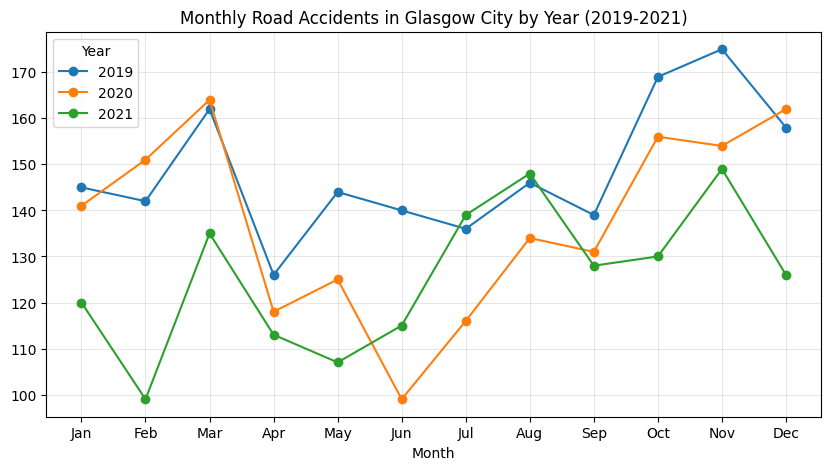

In [54]:
glasgow_df = accident_df[accident_df['District Area'] == 'Glasgow City']
monthly_glasgow_df = glasgow_df.groupby(['Year', 'Month']).size()

monthly_glasgow_df = monthly_glasgow_df.unstack(level=0)

monthly_glasgow_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Glasgow City by Year (2019-2021)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

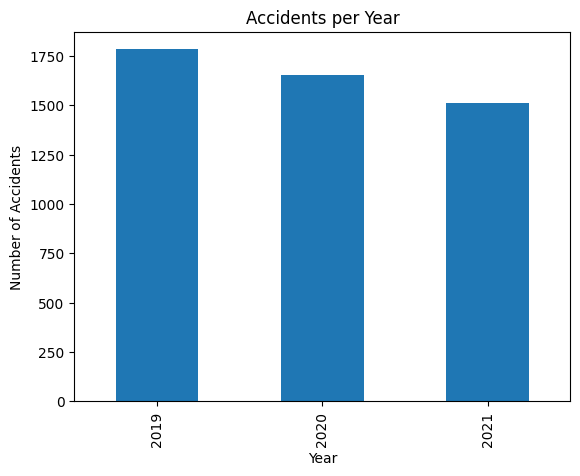

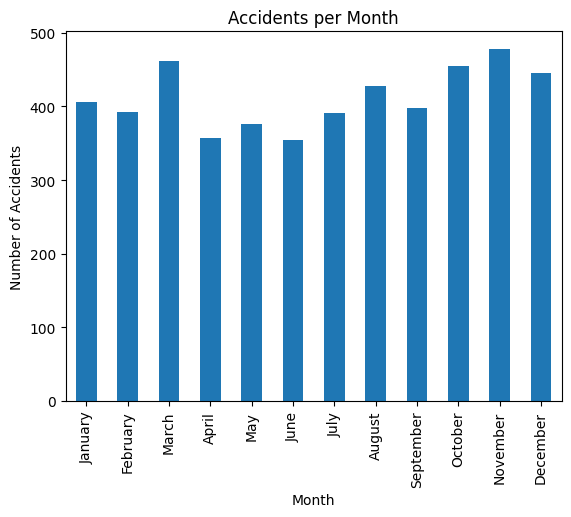

DayOfWeek
Monday       522
Tuesday      732
Wednesday    709
Thursday     735
Friday       738
Saturday     820
Sunday       686
Name: count, dtype: int64


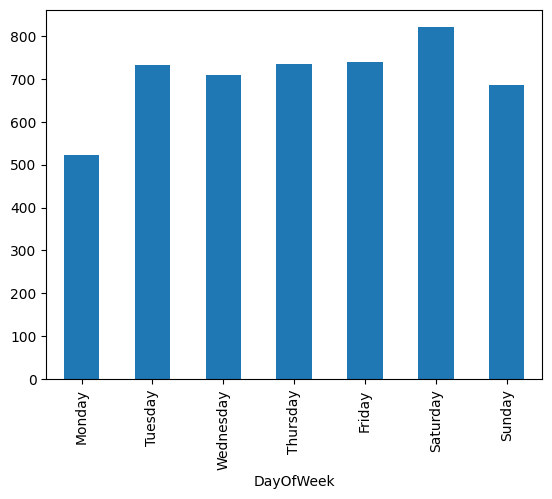

In [55]:
# Accidents per year
accidents_per_year = glasgow_df['Year'].value_counts().sort_index()
accidents_per_month = glasgow_df['Month'].value_counts().sort_index()
accidents_per_day = glasgow_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Accident Severity in Glasgow City</h1>

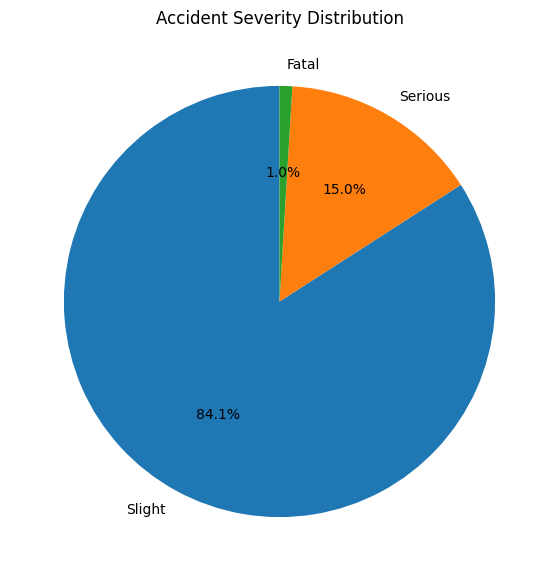

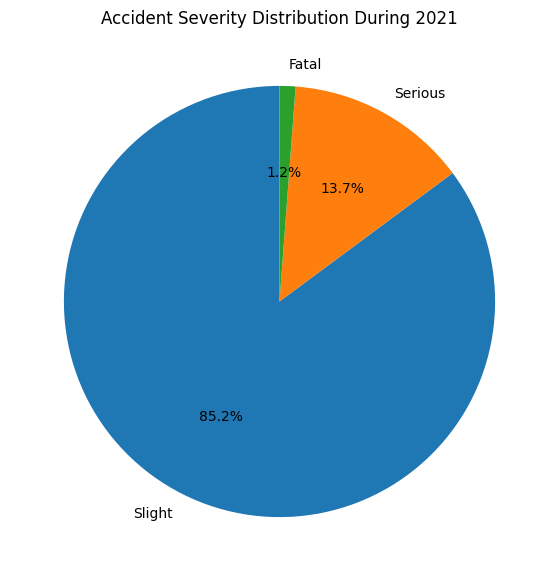

In [56]:
severity_glasgow_df  = glasgow_df['Accident_Severity'].value_counts()

plt.pie(severity_glasgow_df,
        labels = severity_glasgow_df.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_glasgow_df = glasgow_df[glasgow_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_glasgow_df['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution During 2021')
plt.show()

<h2>Insight No 29</h2>
<p>From the District of Glasgow City, we can see from Monthly Road Accidents by year 2019-2021 that the year 2021, accidents decreased compared to 2019 and 2020. It could be the reduced traffic exposure during COVID restrictions that changed travel in 2021, fewer trips and more working from home likely lowered crash risk </p>

<p>The Year 2021 recorded the lowest accident. Working from home could be one of the reason because it lessen the vehicles on the road</p>

<p>The Month of November has the highest number of accident, the article I research said that season has affected the accident with shorter daylight and poorer weather being rain and wet roads.</p>

<p>The day that has the record of the lowest accident is Monday, I think that after traveling many choose to commute instead of driving their car</p>

<p>The majority of accident causes slight severity with 84.1% even during the year 2022 with 85.2%.</p>

<h1>Glasgow City HeatMap Accident</h1>

In [57]:
locations = list(zip(glasgow_df['Latitude'], glasgow_df['Longitude']))

m = folium.Map(location=[glasgow_df['Latitude'].mean(), glasgow_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('glasgow_df.html')
m 

<hr>
<hr>
<hr>
<h1>Southend-on-Sea Analysis</h1>
<img src = 'https://media.gettyimages.com/id/1308471066/photo/aerial-view-of-the-southend-pier-a-major-landmark-in-southend-on-sea-and-the-longest-pleasure.jpg?b=1&s=612x612&w=0&k=20&c=VfCHHFVV_thQzJNugqH7eM_xK0NMY4tvqxfC_4yiy8E='>

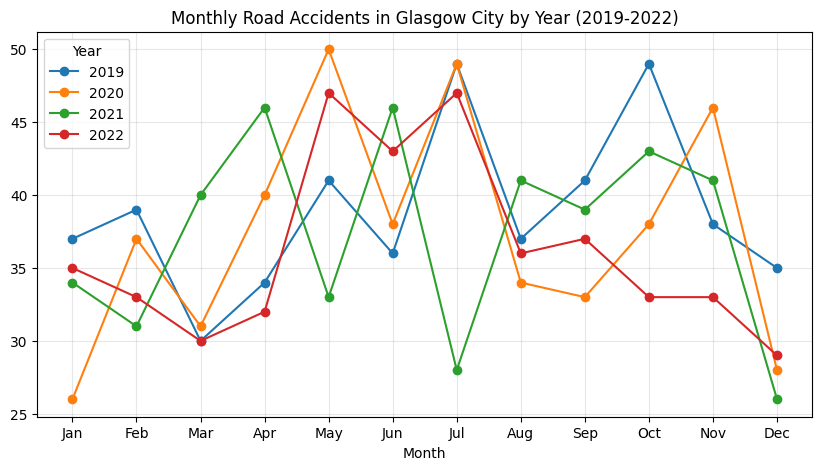

In [58]:
southend_df = accident_df[accident_df['District Area'] == 'Southend-on-Sea']

monthly_southend_df = southend_df.groupby(['Year', 'Month']).size()

monthly_southend_df = monthly_southend_df.unstack(level=0)

monthly_southend_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Glasgow City by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

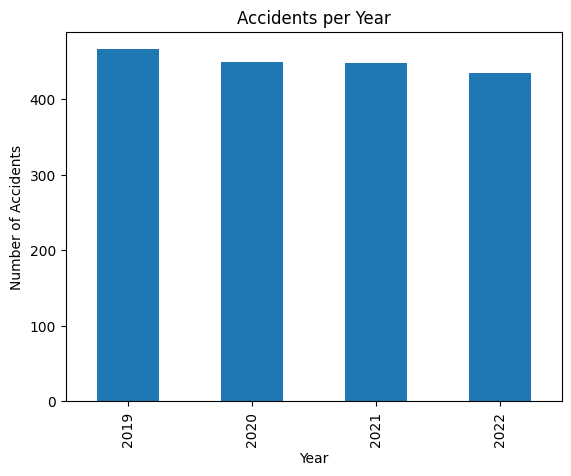

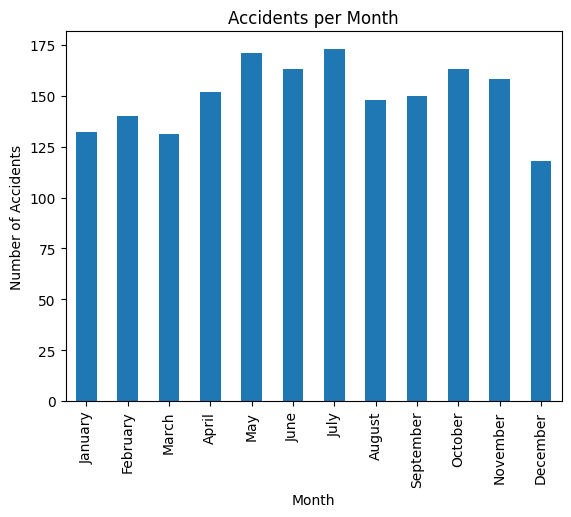

DayOfWeek
Monday       186
Tuesday      263
Wednesday    272
Thursday     240
Friday       287
Saturday     298
Sunday       253
Name: count, dtype: int64


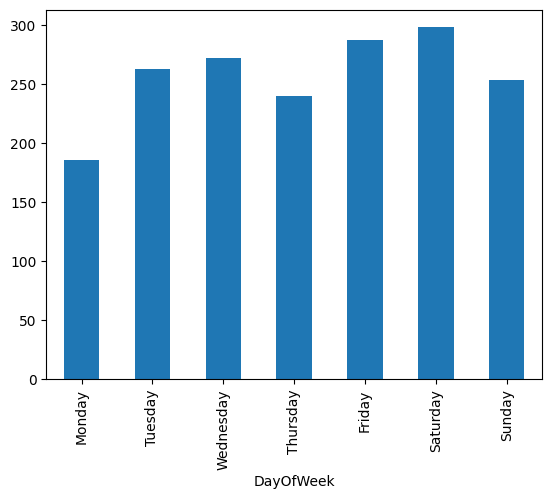

In [59]:
# Accidents per year
accidents_per_year = southend_df['Year'].value_counts().sort_index()
accidents_per_month = southend_df['Month'].value_counts().sort_index()
accidents_per_day = southend_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Accident Severity in Southend-on-Sea</h1>

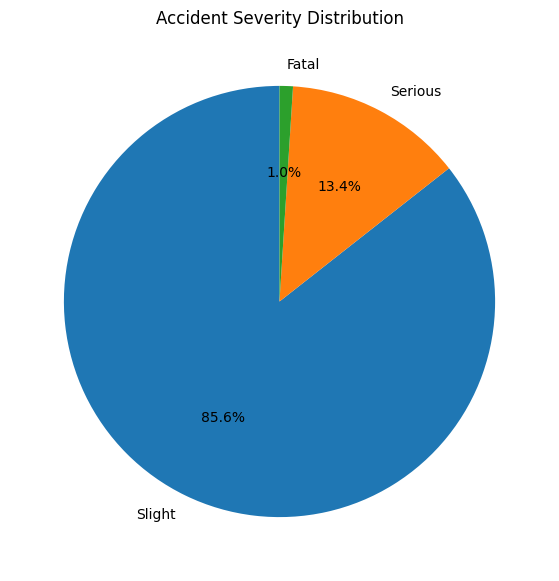

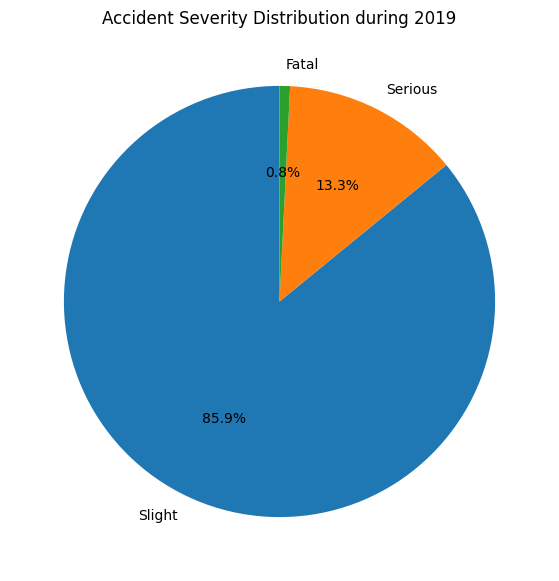

In [60]:
severity_southend_df  = southend_df['Accident_Severity'].value_counts()

plt.pie(severity_southend_df,
        labels = severity_southend_df.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_glasgow_df = glasgow_df[glasgow_df['Year'] == 2019]
# severity_2021
lsc_2021 = severity_2021_glasgow_df['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution during 2019')
plt.show()

<h2>Insight No 30</h2>
<p>From the District of Southend-On-Sea, we can see from Monthly Road Accidents by year 2019-2022 that every year during December, accident decrease which is surprising because Christmas season is busy and there will be more vehicles on the road but I think that traffic jam make vehicles slower that reduced accident also</p>

<p>Accident per Year are almost steady surpassing 400 accident every year</p>

<p>The Month of December has the record of lowest number of accident which maybe because its Christmas season and driver are driving carefully so that they can go to their family safely .</p>

<p>The day that has the record of the highest accident is Saturday which could also be because its weekend and many people are traveling during weekend that cause more accident</p>

<p>The majority of accident causes slight severity with 85.6% even during the year 2019 with 85.9%.</p>

<h1>Southend-On-Sea HeatMap Accident</h1>

In [61]:
locations = list(zip(southend_df['Latitude'], southend_df['Longitude']))

m = folium.Map(location=[southend_df['Latitude'].mean(), southend_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m) 

m.save('southend_df.html')
m 

<hr>
<hr>
<hr>
<h1>Lichfield Analysis</h1>
<img src = 'https://th.bing.com/th/id/OSK.HEROwFkhGSvz7JI3ur7_IRBWD-MD8HgY6qNqLguC4oYAluo?r=0&o=7rm=3&rs=1&pid=ImgDetMain&o=7&rm=3'>

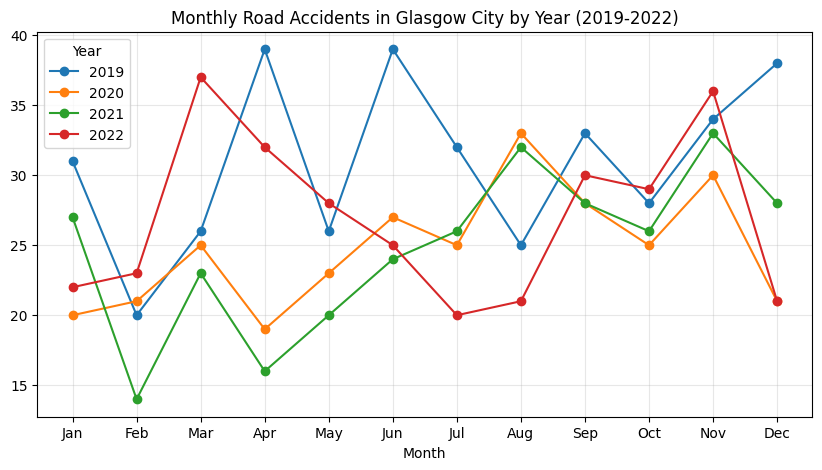

In [62]:
lichfield_df = accident_df[accident_df['District Area'] == 'Lichfield']

monthly_lichfield_df = lichfield_df.groupby(['Year', 'Month']).size()

monthly_lichfield_df = monthly_lichfield_df.unstack(level=0)

monthly_lichfield_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Glasgow City by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

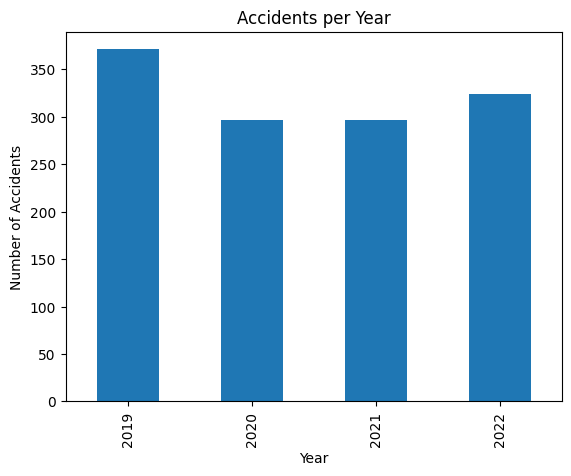

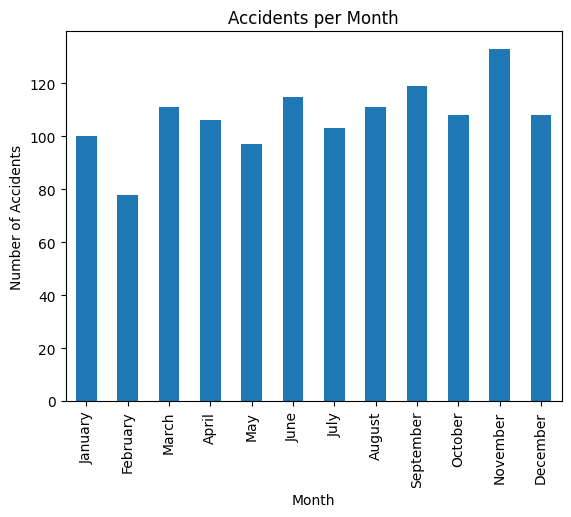

DayOfWeek
Monday       155
Tuesday      199
Wednesday    189
Thursday     168
Friday       189
Saturday     222
Sunday       167
Name: count, dtype: int64


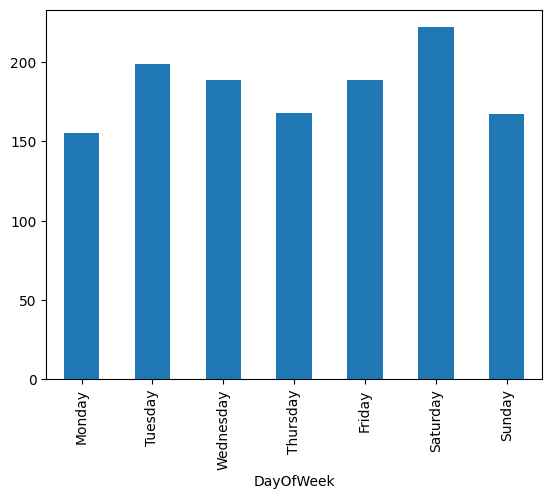

In [63]:
# Accidents per year
accidents_per_year = lichfield_df['Year'].value_counts().sort_index()
accidents_per_month = lichfield_df['Month'].value_counts().sort_index()
accidents_per_day = lichfield_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Accident Severity in Lichfield</h1>

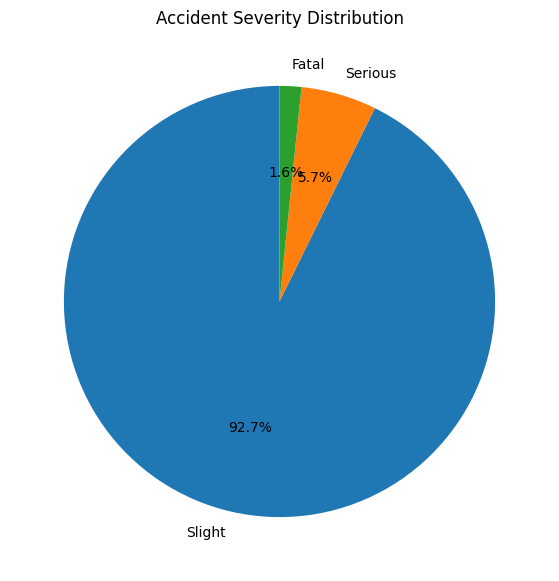

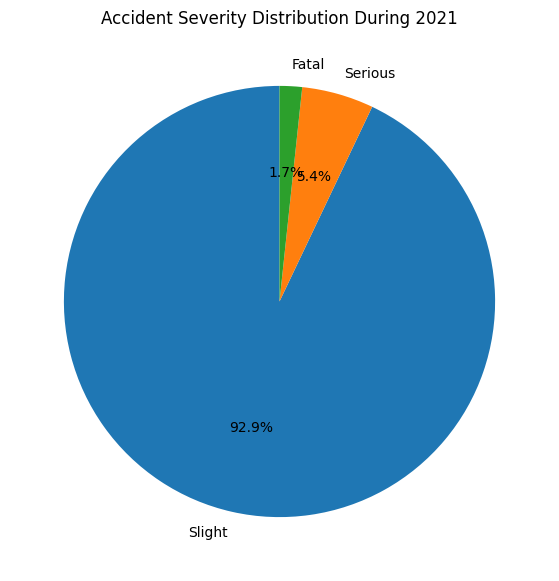

In [64]:
severity_lichfield_df  = lichfield_df['Accident_Severity'].value_counts()

plt.pie(severity_lichfield_df,
        labels = severity_lichfield_df.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_lichfield_df= lichfield_df[lichfield_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_lichfield_df['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution During 2021')
plt.show()

<h2>Insight No 31</h2>
<p>From the District of Lichfield, we can see from Monthly Road Accidents by year 2019-2022 that February 2021 has the lowest record of accident which I think is still affected of COVID while April and June 2019 has the highest recorded and this is before COVID </p>

<p>During the year 2019 are the most accident happen while 2020 and 2021 it decrease because of COVID and increase again during 2022 maybe because traffic are more freely after COVID</p>

<p>Accident mostly happen during November but always decrease when it hit December, I think that since holiday is coming in December there is rush hour during November that causes more work and stress to Driver to compensate when December hit.</p>

<p>The day that has the record of the highest accident is still Saturday, since its UK like the other district that's could be reason why Saturday is always the day when accident happen because its weekend and people are free and more travels happened during weekend </p>

<p>The majority of accident causes slight severity with 92.7% even during the year 2019 with 92.9%. Comparing this to other 5 district, Lichfield has more slight accident severity some reason could be that this district has lower speed zones or this is residential</p>

<h1>Lichfield HeatMap Accident</h1>

In [65]:
locations = list(zip(lichfield_df['Latitude'], lichfield_df['Longitude']))

m = folium.Map(location=[lichfield_df['Latitude'].mean(), lichfield_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m) 

m.save('lichfield_df.html') 
m 